# Support vector machine model using text data vectorized with TF-IDF

In [1]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [3]:
#import data

%store -r x_text_train_tf
%store -r x_text_test_tf
%store -r y_text_train_tf
%store -r y_text_test_tf


In [4]:
#rename variables for ease of use

x_train =  x_text_train_tf
x_test =  x_text_test_tf
y_train = y_text_train_tf
y_test = y_text_test_tf

In [5]:
#define model

svm = SVC()

In [6]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [7]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [8]:
#cross validate on training set to check model stability

cv_scores_tfidf_text_svm = cross_validate(svm, x_train, y_train, cv = k_folds, scoring=scorer)

In [9]:
#check cross validation scores

cv_scores_tfidf_text_svm

{'fit_time': array([1974.44684649, 1919.48578477, 1899.22134447, 1891.6689961 ,
        1909.08538151]),
 'score_time': array([154.1011641 , 153.63205504, 151.59031868, 146.77961111,
        155.28961396]),
 'test_accuracy': array([0.94815809, 0.95023176, 0.94973771, 0.94327193, 0.94205197]),
 'test_precision': array([0.9391635 , 0.94536883, 0.94671107, 0.93470604, 0.92814208]),
 'test_recall': array([0.94506696, 0.94171271, 0.93941063, 0.93903103, 0.94125797]),
 'test_f1_score': array([0.94210598, 0.94353723, 0.94304672, 0.93686354, 0.93465401])}

In [10]:
#fit model on the whole training set
start = process_time()

svm.fit(x_train, y_train)

end=process_time()

In [11]:
#test model on test set

y_pred = svm.predict(x_test)

In [12]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9739
           1       0.94      0.94      0.94      7828

    accuracy                           0.95     17567
   macro avg       0.95      0.95      0.95     17567
weighted avg       0.95      0.95      0.95     17567



In [14]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'SVM model with Text Data (TF-IDF)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

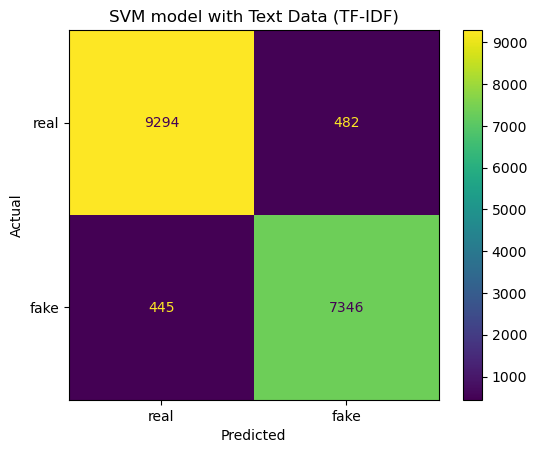

In [15]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='SVM model with Text Data (TF-IDF)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [16]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [17]:
dict = {'data type': 'text',
        'model type':'SVM',
        'vectorize type':'TF-IDF',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [18]:
tfidf_text_SVM=pd.DataFrame.from_dict([dict])

In [19]:
tfidf_text_SVM

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,SVM,TF-IDF,0.947231,0.938426,0.942883,0.940649,2539.4375


In [20]:
#save results for later use

%store tfidf_text_SVM

Stored 'tfidf_text_SVM' (DataFrame)
